In [846]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tabulate import tabulate
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler

In [600]:
os.getcwd()

'/Users/eleonoracocciu/Desktop/Unipi/Data Mining Advanced/fma_metadata'

In [601]:
def tab_missing_values(df):
    FeatureMissValcount = 0
    table_ord = []
    table_ord_def = []
    tot = df.shape[0]
    headers = ["Feature", "Number of missing values", "Percentage", "Present values"]
    
    for i, value in (df.isna().sum().items()):
        if value!=0:
            FeatureMissValcount+=1
            tup = (value, tot)
            table_ord.append((i, (value, tot)))
        
    for element in sorted(table_ord, key=lambda tup:(-tup[1][0], tup[0])):
        percentage = (element[1][0] / element[1][1]) * 100
        percentage = "%.2f %%" %(percentage)
        difference = element[1][1] - element[1][0]
        new_tup = ' / '.join(map(str, (element[1])))
        table_ord_def.append((element[0], new_tup, percentage, difference))
    
    return table_ord_def, headers, FeatureMissValcount

In [602]:
def count_zeros(df):
    tab = []
    headers = ["Features", "Zero values"]
    count = 0

    for column in df.columns:
        count_zeros = (df[column] == 0).sum()
        if count_zeros > 0:
            tab.append((column, count_zeros))
            count+=1
    
    return tab, headers, count

In [725]:
def plot_radar_plot(df, categories, target_class, title, cmap):
    
    num_vars = len(categories)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar = True))

    classes = df[target_class].dropna().unique().tolist()
    
    num = 0
    
    if cmap:
        #palette = plt.get_cmap('Accent')
        palette = ['#0091C2', '#002EB8', '#CC0066', '#FF9124', '#668CFF', '#66CCFF', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']
        
    else:
        palette = ['#CC0066', '#FF9124', '#CCCC00']
        
    
    for i, element in enumerate(classes):
        color = palette[num]
        num+=1
        dfc = df[df[target_class] == element]
        for index, row in dfc.iterrows():
            #val = add_to_radar(dfc, index, color, element)
            val = dfc.loc[index].drop(target_class).values.flatten().tolist()
            val += val[:1]
            ax.plot(angles, val, color= color, linewidth=1, label = element)

    #ax.legend()
    handles, labels = ax.get_legend_handles_labels()  
    lgd = dict(zip(labels, handles))
    ax.legend(lgd.values(), lgd.keys(), loc='upper right', bbox_to_anchor=(1.9, 1), title=title, frameon=True, fontsize = 12)


    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines for each angle and label.
    ax.set_thetagrids(np.degrees(angles), categories)

    # Go through labels and adjust alignment based on where
    # it is in the circle.
    for category, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            category.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            category.set_horizontalalignment('left')
        else:
            category.set_horizontalalignment('right')

    ax.set_rlabel_position(180 / num_vars)

    # Add some custom styling.
    
    # Change the color of the tick labels.
    ax.tick_params(colors='#222222')
    
    # Make the y-axis (0-100) labels smaller.
    ax.tick_params(axis='y', labelsize=8)
    
    # Change the color of the circular gridlines.
    ax.grid(color='#AAAAAA')
    
    # Change the color of the outermost gridline (the spine).
    ax.spines['polar'].set_color('#222222')
    
    # Change the background color inside the circle itself.
    ax.set_facecolor('#FAFAFA')

    # Add title.
    ax.set_title("Comparing Track's Genre Across Dimensions", y=1.08, fontsize = 16)
    
    plt.show()

In [714]:
def plot_distributions(df, target_col, more):
    
    if more:
        colors = ['#0091C2', '#002EB8', '#CC0066', '#FF9124', '#668CFF', '#66CCFF', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']
    else: 
        colors = ['#CC0066', '#FF9124', '#CCCC00']
        
    #nrows = len(df.columns)-1
        
    for column in df.columns:
    
        if column != target_col:

            fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
            ditrib_list = []
            list_element = []

            for element in df[target_col].dropna().unique():
                ditrib_list.append(df[df[target_col] == element][column])  #distribution
                list_element.append('%s' % element)                 #genre

            ax.hist(ditrib_list, label = list_element, color = colors)
            ax.legend(loc='upper right', title = "Track's genre", frameon=True, fontsize = 12)
            ax.set_title(column + " histogram", fontsize = 16)

            plt.show()

<h1>Tracks dataset</h1>

In [606]:
df_tracks = pd.read_csv("tracks.csv")

In [607]:
df_tracks.head()

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,...,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World


We rename the columns of the dataset because there are two rows at the beginning, one for the category (<b>album</b>, <b>track</b>, <b>set</b> and <b>artist</b>) and one for the relative feature. 
So we add the name of category to each relative feature, so that we can drop the first tho rows without loosing information with respect to the category.

In [608]:
for i, column in enumerate (df_tracks.columns):
    col = ''.join([i for i in column if not i.isdigit()])
    if col[-1] == ".":
        col = col.replace(".", "_")
    else :
        col = col+"_"
    #print (i, " ", col + str(df_tracks.iloc[0][column]))
    col = col + str(df_tracks.iloc[0][column])
    df_tracks = df_tracks.rename({column: col}, axis = 1)

In [609]:
df_tracks

,Unnamed: _nan,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106571,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106572,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106573,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106574,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


In [610]:
new_name = df_tracks.iloc[1]['Unnamed: _nan']
df_tracks = df_tracks.rename({'Unnamed: _nan': new_name}, axis = 1)

df_tracks

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106571,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106572,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106573,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106574,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


In [611]:
df_tracks = df_tracks.iloc[2:]

In [612]:
df_tracks

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
5,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
6,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106571,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106572,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106573,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106574,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


Since we eliminated two rows, we need to reset indexes.

In [613]:
df_tracks = df_tracks.reset_index(drop=True)

In [614]:
df_tracks

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106570,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106571,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106572,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


In [615]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   track_id                  106574 non-null  object
 1   album_comments            106574 non-null  object
 2   album_date_created        103045 non-null  object
 3   album_date_released       70294 non-null   object
 4   album_engineer            15295 non-null   object
 5   album_favorites           106574 non-null  object
 6   album_id                  106574 non-null  object
 7   album_information         83149 non-null   object
 8   album_listens             106574 non-null  object
 9   album_producer            18060 non-null   object
 10  album_tags                106574 non-null  object
 11  album_title               105549 non-null  object
 12  album_tracks              106574 non-null  object
 13  album_type                100066 non-null  object
 14  arti

In [616]:
tab, headers, miss_val = tab_missing_values(df_tracks)

print(tabulate(tab, headers, tablefmt = "simple", colalign = ("left", "right", "right")))

print()
print("{} features with missing values".format(miss_val))

Feature                     Number of missing values    Percentage    Present values
------------------------  --------------------------  ------------  ----------------
track_lyricist                       106263 / 106574       99.71 %               311
track_publisher                      105311 / 106574       98.81 %              1263
track_information                    104225 / 106574       97.80 %              2349
track_composer                       102904 / 106574       96.56 %              3670
artist_active_year_end               101199 / 106574       94.96 %              5375
artist_wikipedia_page                100993 / 106574       94.76 %              5581
track_date_recorded                  100415 / 106574       94.22 %              6159
artist_related_projects               93422 / 106574       87.66 %             13152
artist_associated_labels              92303 / 106574       86.61 %             14271
track_language_code                   91550 / 106574       85.90 

In [617]:
for element in tab[:13]:
    column = element[0]
    df_tracks = df_tracks.drop(column, axis = 1)

In [618]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   track_id             106574 non-null  object
 1   album_comments       106574 non-null  object
 2   album_date_created   103045 non-null  object
 3   album_date_released  70294 non-null   object
 4   album_favorites      106574 non-null  object
 5   album_id             106574 non-null  object
 6   album_information    83149 non-null   object
 7   album_listens        106574 non-null  object
 8   album_tags           106574 non-null  object
 9   album_title          105549 non-null  object
 10  album_tracks         106574 non-null  object
 11  album_type           100066 non-null  object
 12  artist_bio           71156 non-null   object
 13  artist_comments      106574 non-null  object
 14  artist_date_created  105718 non-null  object
 15  artist_favorites     106574 non-nu

Some features values are in the format <b>date + hour</b>, but hours are "00:00:00". 
We control if, in these features, there is at least one value that is different from "00:00:00".

In [619]:
count = 0

for cell in df_tracks["album_date_released"].dropna():
    hour = cell[11:]
    if hour != "00:00:00": 
        print(hour)
        count+=1
        
print("Non zero hours %d" %(count))

Non zero hours 0


<b>We remove hour from column album_date_created</b>

In [620]:
df_tracks['album_date_created'] = pd.to_datetime(df_tracks['album_date_created']).dt.date

In [621]:
df_tracks

,track_id,album_comments,album_date_created,album_date_released,album_favorites,album_id,album_information,album_listens,album_tags,album_title,...,track_favorites,track_genre_top,track_genres,track_genres_all,track_interest,track_license,track_listens,track_number,track_tags,track_title
0,2,0,2008-11-26,2009-01-05 00:00:00,4,1,<p></p>,6073,[],AWOL - A Way Of Life,...,2,Hip-Hop,[21],[21],4656,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,3,[],Food
1,3,0,2008-11-26,2009-01-05 00:00:00,4,1,<p></p>,6073,[],AWOL - A Way Of Life,...,1,Hip-Hop,[21],[21],1470,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,4,[],Electric Ave
2,5,0,2008-11-26,2009-01-05 00:00:00,4,1,<p></p>,6073,[],AWOL - A Way Of Life,...,6,Hip-Hop,[21],[21],1933,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,6,[],This World
3,10,0,2008-11-26,2008-02-06 00:00:00,4,6,NaN,47632,[],Constant Hitmaker,...,178,Pop,[10],[10],54881,Attribution-NonCommercial-NoDerivatives (aka M...,50135,1,[],Freeway
4,20,0,2008-11-26,2009-01-06 00:00:00,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,[],Niris,...,0,NaN,"[76, 103]","[17, 10, 76, 103]",978,Attribution-NonCommercial-NoDerivatives (aka M...,361,3,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,0,2017-03-30,2017-02-17 00:00:00,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,[],"Live at Monty Hall, 2/17/2017",...,1,Rock,[25],"[25, 12]",122,Creative Commons Attribution-NonCommercial-NoD...,102,3,[],The Auger
106570,155317,0,2017-03-30,2017-02-17 00:00:00,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,[],"Live at Monty Hall, 2/17/2017",...,1,Rock,[25],"[25, 12]",194,Creative Commons Attribution-NonCommercial-NoD...,165,4,[],Let's Skin Ruby
106571,155318,0,2017-03-30,2017-02-17 00:00:00,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,[],"Live at Monty Hall, 2/17/2017",...,2,Rock,[25],"[25, 12]",214,Creative Commons Attribution-NonCommercial-NoD...,168,6,[],My House Smells Like Kim Deal/Pulp
106572,155319,0,2017-03-30,2017-02-17 00:00:00,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,[],"Live at Monty Hall, 2/17/2017",...,0,Rock,[25],"[25, 12]",336,Creative Commons Attribution-NonCommercial-NoD...,294,5,[],The Man With Two Mouths


In [622]:
print (df_tracks['album_date_created'].dtype)

object


In [623]:
df_tracks['album_date_created']

0         2008-11-26
1         2008-11-26
2         2008-11-26
3         2008-11-26
4         2008-11-26
             ...    
106569    2017-03-30
106570    2017-03-30
106571    2017-03-30
106572    2017-03-30
106573    2017-03-26
Name: album_date_created, Length: 106574, dtype: object

In [624]:
df_tracks['album_date_created'] = pd.to_datetime(df_tracks['album_date_created'], errors = "coerce")

In [625]:
df_tracks[['album_date_created']]

,album_date_created
0,2008-11-26
1,2008-11-26
2,2008-11-26
3,2008-11-26
4,2008-11-26
...,...
106569,2017-03-30
106570,2017-03-30
106571,2017-03-30
106572,2017-03-30


In [626]:
data = df_tracks['album_date_created'].dt.year.tolist()
data = ['{:.0f}'.format(x) for x in data]
#data

In [627]:
new_pos = df_tracks.columns.get_loc('album_date_created')+1

In [628]:
df_tracks.insert(new_pos, 'album_year_created', data)

In [629]:
df_tracks['album_date_released'] = pd.to_datetime(df_tracks['album_date_released']).dt.date

In [630]:
df_tracks['album_date_released'] = pd.to_datetime(df_tracks['album_date_released'], errors = "coerce")

In [631]:
df_tracks[['album_date_released']]

,album_date_released
0,2009-01-05
1,2009-01-05
2,2009-01-05
3,2008-02-06
4,2009-01-06
...,...
106569,2017-02-17
106570,2017-02-17
106571,2017-02-17
106572,2017-02-17


In [632]:
data = df_tracks['album_date_released'].dt.year.tolist()
data = ['{:.0f}'.format(x) for x in data]

In [633]:
new_pos = df_tracks.columns.get_loc('album_date_released')+1

In [634]:
df_tracks.insert(new_pos, 'album_year_released', data)

In [635]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   track_id             106574 non-null  object        
 1   album_comments       106574 non-null  object        
 2   album_date_created   103045 non-null  datetime64[ns]
 3   album_year_created   106574 non-null  object        
 4   album_date_released  70294 non-null   datetime64[ns]
 5   album_year_released  106574 non-null  object        
 6   album_favorites      106574 non-null  object        
 7   album_id             106574 non-null  object        
 8   album_information    83149 non-null   object        
 9   album_listens        106574 non-null  object        
 10  album_tags           106574 non-null  object        
 11  album_title          105549 non-null  object        
 12  album_tracks         106574 non-null  object        
 13  album_type    

In [636]:
df_tracks[df_tracks.columns[28:]]

,track_bit_rate,track_comments,track_date_created,track_duration,track_favorites,track_genre_top,track_genres,track_genres_all,track_interest,track_license,track_listens,track_number,track_tags,track_title
0,256000,0,2008-11-26 01:48:12,168,2,Hip-Hop,[21],[21],4656,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,3,[],Food
1,256000,0,2008-11-26 01:48:14,237,1,Hip-Hop,[21],[21],1470,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,4,[],Electric Ave
2,256000,0,2008-11-26 01:48:20,206,6,Hip-Hop,[21],[21],1933,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,6,[],This World
3,192000,0,2008-11-25 17:49:06,161,178,Pop,[10],[10],54881,Attribution-NonCommercial-NoDerivatives (aka M...,50135,1,[],Freeway
4,256000,0,2008-11-26 01:48:56,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",978,Attribution-NonCommercial-NoDerivatives (aka M...,361,3,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,320000,0,2017-03-30 15:23:34,162,1,Rock,[25],"[25, 12]",122,Creative Commons Attribution-NonCommercial-NoD...,102,3,[],The Auger
106570,320000,0,2017-03-30 15:23:36,217,1,Rock,[25],"[25, 12]",194,Creative Commons Attribution-NonCommercial-NoD...,165,4,[],Let's Skin Ruby
106571,320000,0,2017-03-30 15:23:37,404,2,Rock,[25],"[25, 12]",214,Creative Commons Attribution-NonCommercial-NoD...,168,6,[],My House Smells Like Kim Deal/Pulp
106572,320000,0,2017-03-30 15:23:39,146,0,Rock,[25],"[25, 12]",336,Creative Commons Attribution-NonCommercial-NoD...,294,5,[],The Man With Two Mouths


In [637]:
features_to_drop = ["album_comments", "album_date_created", "album_date_released", "album_favorites", "album_information", "album_title",
 "artist_bio", "artist_comments", "artist_date_created", "artist_favorites", "artist_latitude", "artist_location",
 "artist_longitude", "artist_members", "artist_name", "artist_tags", "artist_website", "track_comments", "track_date_created",
 "track_favorites", "track_interest", "track_license", "track_listens", "track_title"]

In [638]:
garbage_df_tracks = pd.DataFrame()

for column in features_to_drop:
    garbage_df_tracks[column] = df_tracks[column]
    del df_tracks[column]

In [639]:
df_tracks

,track_id,album_year_created,album_year_released,album_id,album_listens,album_tags,album_tracks,album_type,artist_id,set_split,set_subset,track_bit_rate,track_duration,track_genre_top,track_genres,track_genres_all,track_number,track_tags
0,2,2008,2009,1,6073,[],7,Album,1,training,small,256000,168,Hip-Hop,[21],[21],3,[]
1,3,2008,2009,1,6073,[],7,Album,1,training,medium,256000,237,Hip-Hop,[21],[21],4,[]
2,5,2008,2009,1,6073,[],7,Album,1,training,small,256000,206,Hip-Hop,[21],[21],6,[]
3,10,2008,2008,6,47632,[],2,Album,6,training,small,192000,161,Pop,[10],[10],1,[]
4,20,2008,2009,4,2710,[],13,Album,4,training,large,256000,311,NaN,"[76, 103]","[17, 10, 76, 103]",3,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,2017,2017,22940,1506,[],6,Live Performance,24357,training,large,320000,162,Rock,[25],"[25, 12]",3,[]
106570,155317,2017,2017,22940,1506,[],6,Live Performance,24357,training,large,320000,217,Rock,[25],"[25, 12]",4,[]
106571,155318,2017,2017,22940,1506,[],6,Live Performance,24357,training,large,320000,404,Rock,[25],"[25, 12]",6,[]
106572,155319,2017,2017,22940,1506,[],6,Live Performance,24357,training,large,320000,146,Rock,[25],"[25, 12]",5,[]


In [640]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   track_id             106574 non-null  object
 1   album_year_created   106574 non-null  object
 2   album_year_released  106574 non-null  object
 3   album_id             106574 non-null  object
 4   album_listens        106574 non-null  object
 5   album_tags           106574 non-null  object
 6   album_tracks         106574 non-null  object
 7   album_type           100066 non-null  object
 8   artist_id            106574 non-null  object
 9   set_split            106574 non-null  object
 10  set_subset           106574 non-null  object
 11  track_bit_rate       106574 non-null  object
 12  track_duration       106574 non-null  object
 13  track_genre_top      49598 non-null   object
 14  track_genres         106574 non-null  object
 15  track_genres_all     106574 non-nu

In [641]:
garbage_df_tracks['album_tags'] = df_tracks['album_tags']
garbage_df_tracks['track_tags'] = df_tracks['track_tags']

del df_tracks['album_tags']
del df_tracks['track_tags']

In [642]:
df_tracks

,track_id,album_year_created,album_year_released,album_id,album_listens,album_tracks,album_type,artist_id,set_split,set_subset,track_bit_rate,track_duration,track_genre_top,track_genres,track_genres_all,track_number
0,2,2008,2009,1,6073,7,Album,1,training,small,256000,168,Hip-Hop,[21],[21],3
1,3,2008,2009,1,6073,7,Album,1,training,medium,256000,237,Hip-Hop,[21],[21],4
2,5,2008,2009,1,6073,7,Album,1,training,small,256000,206,Hip-Hop,[21],[21],6
3,10,2008,2008,6,47632,2,Album,6,training,small,192000,161,Pop,[10],[10],1
4,20,2008,2009,4,2710,13,Album,4,training,large,256000,311,NaN,"[76, 103]","[17, 10, 76, 103]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,162,Rock,[25],"[25, 12]",3
106570,155317,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,217,Rock,[25],"[25, 12]",4
106571,155318,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,404,Rock,[25],"[25, 12]",6
106572,155319,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,146,Rock,[25],"[25, 12]",5


<h4>Unique values</h4>

In [643]:
some_unique_values = []
headers = ["Features with zero values", "Num", "Unique values"]
uniques = {}

for column in df_tracks.columns:
    unique = df_tracks[column].unique()
    u = [str(i) for i in unique] 
    u = [i for i in u if i!= 'nan']
    unique = np.array(u)
    some_unique_values.append((column, len(u), unique))
    uniques[column] = unique
    
print(tabulate(some_unique_values, headers, tablefmt = "simple", numalign = ("left", "left", "right")))

Features with zero values       Num  Unique values
---------------------------  ------  --------------------------------------------------------------------------
track_id                     106574  ['2' '3' '5' ... '155318' '155319' '155320']
album_year_created           10      ['2008' '2009' '2010' '2011' '2012' '2013' '2014' '2016' '2015' '2017']
album_year_released          57      ['2009' '2008' '2006' '2007' '2005' '1995' '2004' '2003' '1982' '1981'
                                      '2002' '1999' '2001' '2000' '1998' '1996' '1912' '1916' '1911' '1913'
                                      '1909' '1905' '1907' '1989' '1997' '2010' '2011' '1980' '1985' '1992'
                                      '1988' '1930' '1965' '1990' '1993' '1967' '1969' '2015' '1978' '2013'
                                      '1994' '1979' '1987' '1976' '1986' '2012' '1984' '1973' '1971' '2014'
                                      '1991' '1968' '2016' '1902' '2021' '1974' '2017']
album_id          

<h4>Zero values</h4>

In [644]:
tab, headers, count = count_zeros(df_tracks)

print(tabulate(tab, headers, tablefmt = "simple", colalign = ("left", "right")))
print()
print("{} columns with zero values".format(count))

Features          Zero values
--------------  -------------
album_tracks               84
track_duration              4
track_number             5953

3 columns with zero values


In [645]:
comment_list = ["tracks of the album", "track duration in seconds?", "track number"]

In [646]:
evaluating_list = ["84 album tracks 0? (there are also album track -1)", 
                   "Strange, a track should last at least a few seconds \nor a few minutes", "Ok"]

In [647]:
tab = []
head = ["Features", "Zero values", "Comments", "Doubts"]
count = 0

for column in df_tracks.columns:
    count_zeros = (df_tracks[column] == 0).sum()
    if count_zeros > 0:
        tab.append((column, count_zeros, comment_list[count], evaluating_list[count]))
        count+=1

print("{} columns with zero values".format(count))
print()
print(tabulate(tab, head, tablefmt = "simple", colalign = ("left", "center", "left", "left")))

3 columns with zero values

Features         Zero values   Comments                    Doubts
--------------  -------------  --------------------------  ----------------------------------------------------
album_tracks         84        tracks of the album         84 album tracks 0? (there are also album track -1)
track_duration        4        track duration in seconds?  Strange, a track should last at least a few seconds
                                                           or a few minutes
track_number        5953       track number                Ok


In [648]:
df_tracks[df_tracks['track_duration'] == 0]

,track_id,album_year_created,album_year_released,album_id,album_listens,album_tracks,album_type,artist_id,set_split,set_subset,track_bit_rate,track_duration,track_genre_top,track_genres,track_genres_all,track_number
69817,106611,2012,2011,10938,42863,14,Single Tracks,12351,test,large,128000,0,NaN,"[456, 659]","[456, 659, 5, 38]",12
69818,106613,2012,2012,11260,131037,44,Single Tracks,12351,test,large,128000,0,NaN,"[456, 659]","[456, 659, 5, 38]",99
76074,114497,2015,nan,17509,325595,389,Album,19510,training,large,127706,0,Pop,[76],"[10, 76]",106
93901,137686,2016,nan,20682,3887,1,Single Tracks,20655,training,large,320000,0,Instrumental,"[18, 1235]","[18, 1235]",1


<b>Let's check again features with missing values</b>

In [649]:
tab, headers, miss_val = tab_missing_values(df_tracks)

print(tabulate(tab, headers, tablefmt = "simple", colalign = ("left", "right", "right")))

print()
print("{} features with missing values".format(miss_val))

Feature            Number of missing values    Percentage    Present values
---------------  --------------------------  ------------  ----------------
track_genre_top              56976 / 106574       53.46 %             49598
album_type                    6508 / 106574        6.11 %            100066

2 features with missing values


<b>We verify if there are columns which have a single value for all cells.</b>

In [650]:
df_tracks.nunique() == 1

track_id               False
album_year_created     False
album_year_released    False
album_id               False
album_listens          False
album_tracks           False
album_type             False
artist_id              False
set_split              False
set_subset             False
track_bit_rate         False
track_duration         False
track_genre_top        False
track_genres           False
track_genres_all       False
track_number           False
dtype: bool

In [651]:
df_tracks.shape

(106574, 16)

In [652]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   track_id             106574 non-null  object
 1   album_year_created   106574 non-null  object
 2   album_year_released  106574 non-null  object
 3   album_id             106574 non-null  object
 4   album_listens        106574 non-null  object
 5   album_tracks         106574 non-null  object
 6   album_type           100066 non-null  object
 7   artist_id            106574 non-null  object
 8   set_split            106574 non-null  object
 9   set_subset           106574 non-null  object
 10  track_bit_rate       106574 non-null  object
 11  track_duration       106574 non-null  object
 12  track_genre_top      49598 non-null   object
 13  track_genres         106574 non-null  object
 14  track_genres_all     106574 non-null  object
 15  track_number         106574 non-nu

<b>We verify if there are rows which have all values equals to 'nan'</b>

In [653]:
df_tracks.isnull().values.all(axis=0)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

<b>We verify if there are columns which have all values equals to 'nan'</b>

In [654]:
df_tracks.isnull().values.all(axis=1)

array([False, False, False, ..., False, False, False])

Text(0.5, 0.98, "Track's genre")

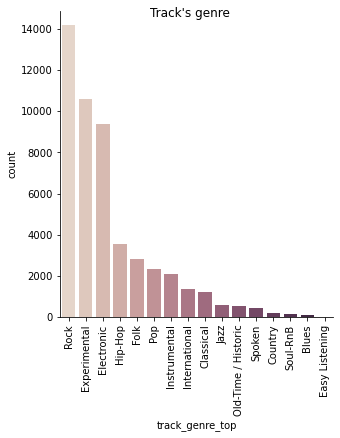

In [655]:
ax = sns.catplot(x = "track_genre_top", data = df_tracks, kind = 'count', palette="ch:.15", order = df_tracks['track_genre_top'].value_counts().index)
ax.set_xticklabels(rotation=90)
ax.fig.suptitle("Track's genre")

In [656]:
def number_of_elements(df, column, element):
    return df[df[column] == element].shape[0]

In [657]:
print("{0:27} {1}".format("Tracks of Rock", number_of_elements(df_tracks, "track_genre_top", "Rock")))
print("{0:27} {1}".format("Tracks of Experimental", number_of_elements(df_tracks, "track_genre_top", "Experimental")))
print("{0:27} {1}".format("Tracks of Electronic", number_of_elements(df_tracks, "track_genre_top", "Electronic")))

Tracks of Rock              14182
Tracks of Experimental      10608
Tracks of Electronic        9372


<h3>We create a dataset which contains only the three principal genres Rock, Experimental and Electronic</h3>

In [707]:
df_tracks_part_reduced = pd.DataFrame()
df_tracks_part_reduced = df_tracks.loc[(df_tracks['track_genre_top'] == 'Rock') | 
                               (df_tracks['track_genre_top'] == 'Experimental') |
                              (df_tracks['track_genre_top'] == 'Electronic')]
df_tracks_part_reduced

,track_id,album_year_created,album_year_released,album_id,album_listens,album_tracks,album_type,artist_id,set_split,set_subset,track_bit_rate,track_duration,track_genre_top,track_genres,track_genres_all,track_number
10,135,2008,2009,58,3331,4,Single Tracks,52,training,large,256000,837,Rock,"[45, 58]","[58, 12, 45]",0
11,136,2008,2009,58,3331,4,Single Tracks,52,training,medium,256000,509,Rock,"[45, 58]","[58, 12, 45]",0
12,137,2008,2006,59,1681,2,Live Performance,53,training,large,256000,1233,Experimental,"[1, 32]","[32, 1, 38]",1
13,138,2008,2006,59,1681,2,Live Performance,53,training,large,256000,1231,Experimental,"[1, 32]","[32, 1, 38]",2
22,148,2008,2009,66,1831,1,Album,57,validation,small,256000,138,Experimental,[1],"[1, 38]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106568,155315,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,38,Rock,[25],"[25, 12]",1
106569,155316,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,162,Rock,[25],"[25, 12]",3
106570,155317,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,217,Rock,[25],"[25, 12]",4
106571,155318,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,404,Rock,[25],"[25, 12]",6


In [708]:
cols = ["album_year_created", "track_bit_rate", "track_duration"]

<b>We drop all columns that are nonessential</b>

In [709]:
for column in df_tracks_part_reduced.columns:
    if column != 'track_genre_top':
        if column not in cols:
            df_tracks_part_reduced = df_tracks_part_reduced.drop(column, axis =1)
        
df_tracks_part_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34162 entries, 10 to 106572
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   album_year_created  34162 non-null  object
 1   track_bit_rate      34162 non-null  object
 2   track_duration      34162 non-null  object
 3   track_genre_top     34162 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


<b>We convert the dtype of all columns except that of track's genre</b>

In [711]:
for col in df_tracks_part_reduced.columns:
    if col in cols:
        df_tracks_part_reduced.loc[:, col] = pd.to_numeric(df_tracks_part_reduced.loc[:, col], errors = "coerce", downcast='integer')

In [712]:
df_tracks_part_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34162 entries, 10 to 106572
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   album_year_created  33421 non-null  float64
 1   track_bit_rate      34162 non-null  int32  
 2   track_duration      34162 non-null  int16  
 3   track_genre_top     34162 non-null  object 
dtypes: float64(1), int16(1), int32(1), object(1)
memory usage: 1000.8+ KB


<b>We observe the distribution of the three main track's genres across variables</b>

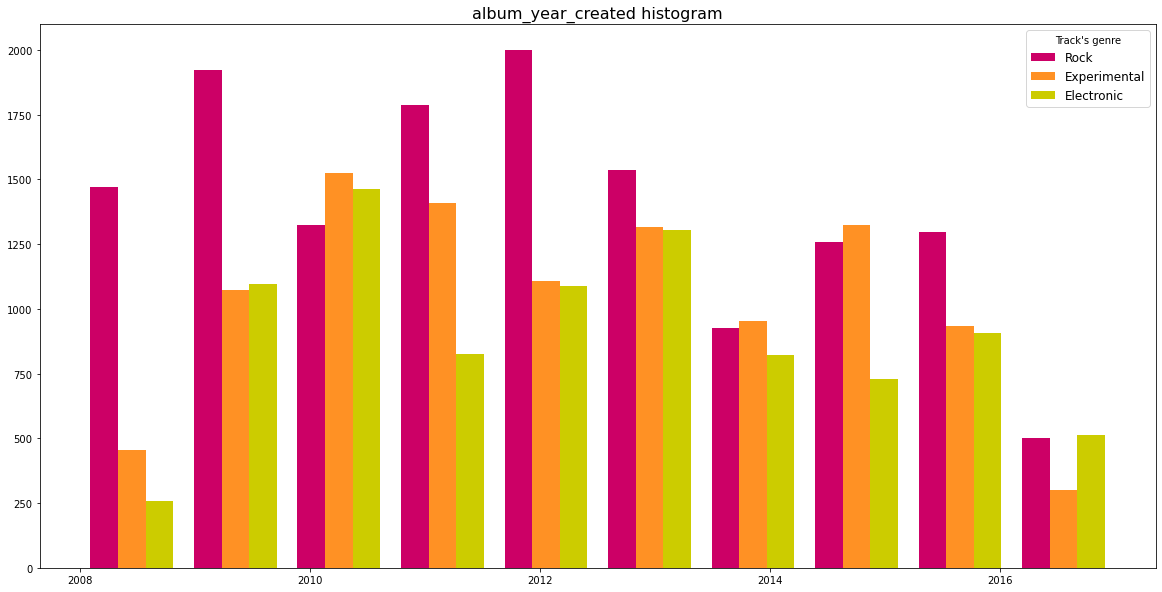

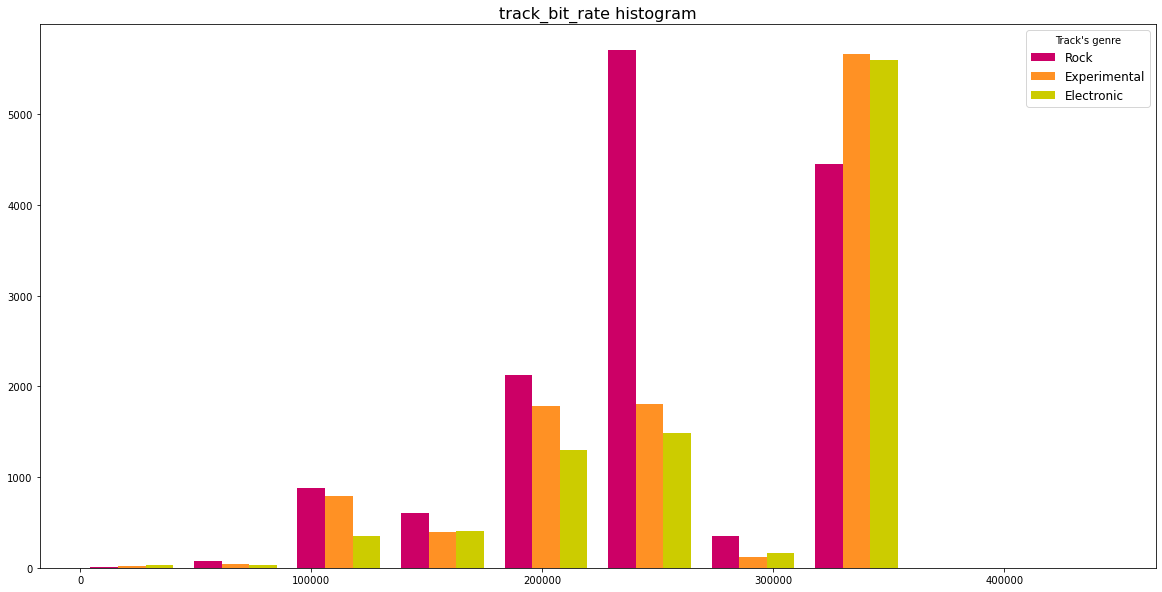

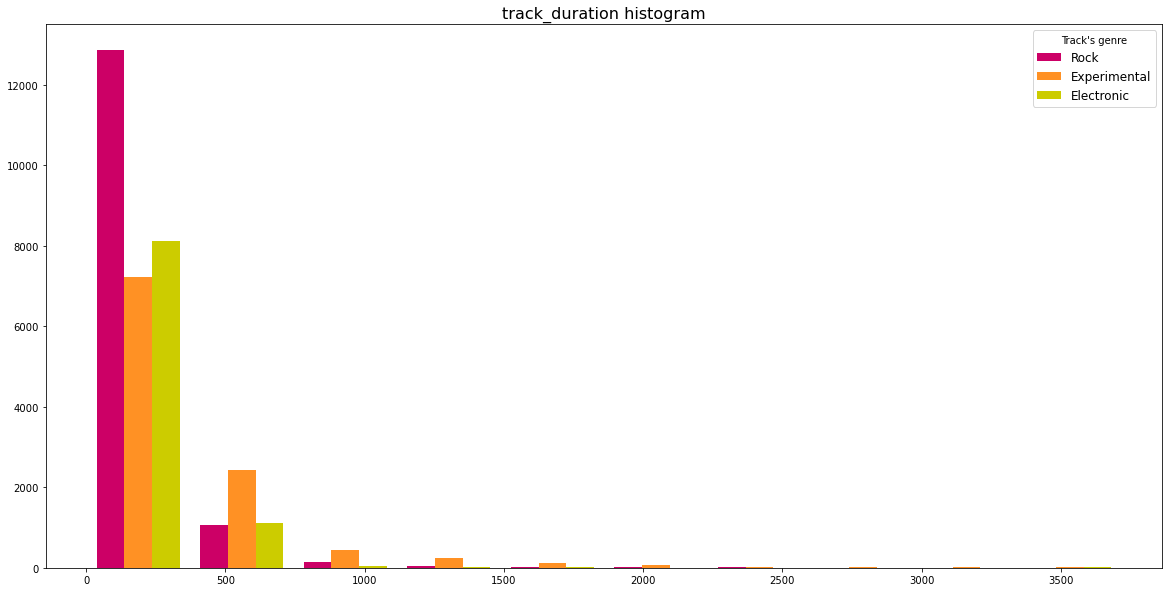

In [715]:
plot_distributions(df_tracks_part_reduced, 'track_genre_top', False)

In [716]:
class_column = list(df_tracks_part_reduced["track_genre_top"].values)

In [717]:
new_column_idx = df_tracks_part_reduced.columns.get_loc('track_duration')+1
new_column_idx

3

In [718]:
del df_tracks_part_reduced["track_genre_top"]

<b>We normalize the dataset for the comparisons of the all features</b>

In [719]:
x = df_tracks_part_reduced.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_tracks_part_reduced_norm = pd.DataFrame(x_scaled, columns = df_tracks_part_reduced.columns)

df_tracks_part_reduced_norm

,album_year_created,track_bit_rate,track_duration
0,0.0,0.571430,0.224913
1,0.0,0.571430,0.136669
2,0.0,0.571430,0.331450
3,0.0,0.571430,0.330912
4,0.0,0.571430,0.036858
...,...,...,...
34157,1.0,0.714286,0.009954
34158,1.0,0.714286,0.043315
34159,1.0,0.714286,0.058111
34160,1.0,0.714286,0.108421


In [720]:
min_max_scaler.inverse_transform(min_max_scaler.transform(x))

array([[2.008e+03, 2.560e+05, 8.370e+02],
       [2.008e+03, 2.560e+05, 5.090e+02],
       [2.008e+03, 2.560e+05, 1.233e+03],
       ...,
       [2.017e+03, 3.200e+05, 2.170e+02],
       [2.017e+03, 3.200e+05, 4.040e+02],
       [2.017e+03, 3.200e+05, 1.460e+02]])

In [721]:
df_tracks_part_reduced

,album_year_created,track_bit_rate,track_duration
10,2008.0,256000,837
11,2008.0,256000,509
12,2008.0,256000,1233
13,2008.0,256000,1231
22,2008.0,256000,138
...,...,...,...
106568,2017.0,320000,38
106569,2017.0,320000,162
106570,2017.0,320000,217
106571,2017.0,320000,404


In [722]:
df_tracks_part_reduced_norm.insert(new_column_idx, 'track_genre_top', class_column)

In [723]:
df_tracks_part_reduced_norm

,album_year_created,track_bit_rate,track_duration,track_genre_top
0,0.0,0.571430,0.224913,Rock
1,0.0,0.571430,0.136669,Rock
2,0.0,0.571430,0.331450,Experimental
3,0.0,0.571430,0.330912,Experimental
4,0.0,0.571430,0.036858,Experimental
...,...,...,...,...
34157,1.0,0.714286,0.009954,Rock
34158,1.0,0.714286,0.043315,Rock
34159,1.0,0.714286,0.058111,Rock
34160,1.0,0.714286,0.108421,Rock


<b>We realize the parallel coordinates plot for the three main track's genres</b>

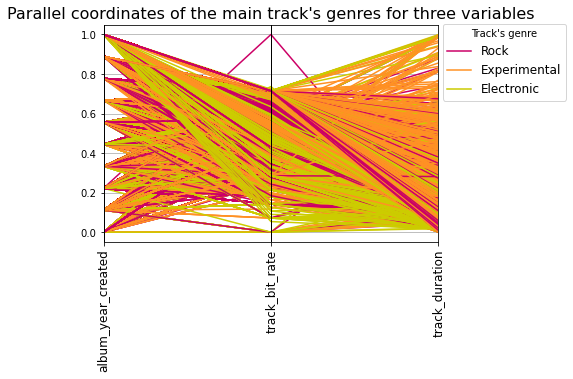

In [724]:
ax1 = parallel_coordinates(df_tracks_part_reduced_norm, 'track_genre_top', cols = cols, 
                                     color=('#CC0066', '#FF9124', '#CCCC00'))

ax1.legend(loc='upper right', bbox_to_anchor = (1.4, 1.03), title = "Track's genre", frameon = True, fontsize = 12)

plt.title("Parallel coordinates of the main track's genres for three variables", fontsize = 16)
plt.xticks(rotation=90, fontsize = 12)
plt.show()

<b>Now we realize the radar plot of the three main track's genres</b>

In [726]:
categories = [i for i in df_tracks_part_reduced_norm.columns if i != 'track_genre_top']
categories

['album_year_created', 'track_bit_rate', 'track_duration']

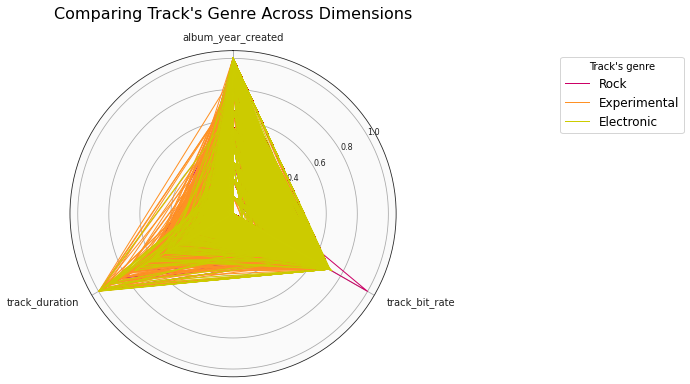

In [727]:
plot_radar_plot(df_tracks_part_reduced_norm, categories, 'track_genre_top', "Track's genre", False)

<h3>We create a copy of the original dataset to compare all track's genres on three features</h3>

In [728]:
df_tracks_reduced = df_tracks.copy()
df_tracks_reduced

,track_id,album_year_created,album_year_released,album_id,album_listens,album_tracks,album_type,artist_id,set_split,set_subset,track_bit_rate,track_duration,track_genre_top,track_genres,track_genres_all,track_number
0,2,2008,2009,1,6073,7,Album,1,training,small,256000,168,Hip-Hop,[21],[21],3
1,3,2008,2009,1,6073,7,Album,1,training,medium,256000,237,Hip-Hop,[21],[21],4
2,5,2008,2009,1,6073,7,Album,1,training,small,256000,206,Hip-Hop,[21],[21],6
3,10,2008,2008,6,47632,2,Album,6,training,small,192000,161,Pop,[10],[10],1
4,20,2008,2009,4,2710,13,Album,4,training,large,256000,311,NaN,"[76, 103]","[17, 10, 76, 103]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,162,Rock,[25],"[25, 12]",3
106570,155317,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,217,Rock,[25],"[25, 12]",4
106571,155318,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,404,Rock,[25],"[25, 12]",6
106572,155319,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,146,Rock,[25],"[25, 12]",5


<b>We remove nonessential features</b>

In [729]:
for column in df_tracks_reduced.columns:
    if column != 'track_genre_top':
        if column not in cols:
            df_tracks_reduced = df_tracks_reduced.drop(column, axis =1)
        
df_tracks_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   album_year_created  106574 non-null  object
 1   track_bit_rate      106574 non-null  object
 2   track_duration      106574 non-null  object
 3   track_genre_top     49598 non-null   object
dtypes: object(4)
memory usage: 3.3+ MB


<b>We change the dtype of all columns except that of the track's genres</b>

In [730]:
for col in df_tracks_reduced.columns:
    if col in cols:
        df_tracks_reduced.loc[:, col] = pd.to_numeric(df_tracks_reduced.loc[:, col], errors = "coerce", downcast='integer')

In [731]:
df_tracks_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   album_year_created  103045 non-null  float64
 1   track_bit_rate      106574 non-null  int32  
 2   track_duration      106574 non-null  int16  
 3   track_genre_top     49598 non-null   object 
dtypes: float64(1), int16(1), int32(1), object(1)
memory usage: 2.2+ MB


<b>We plot the distribution of all track's genres on three features</b>

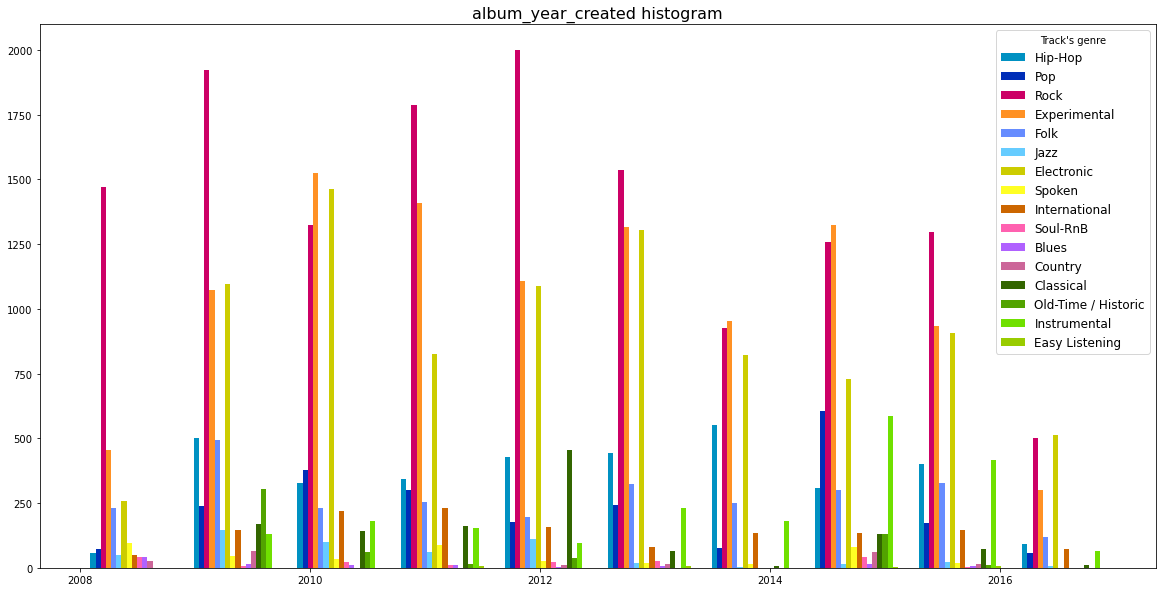

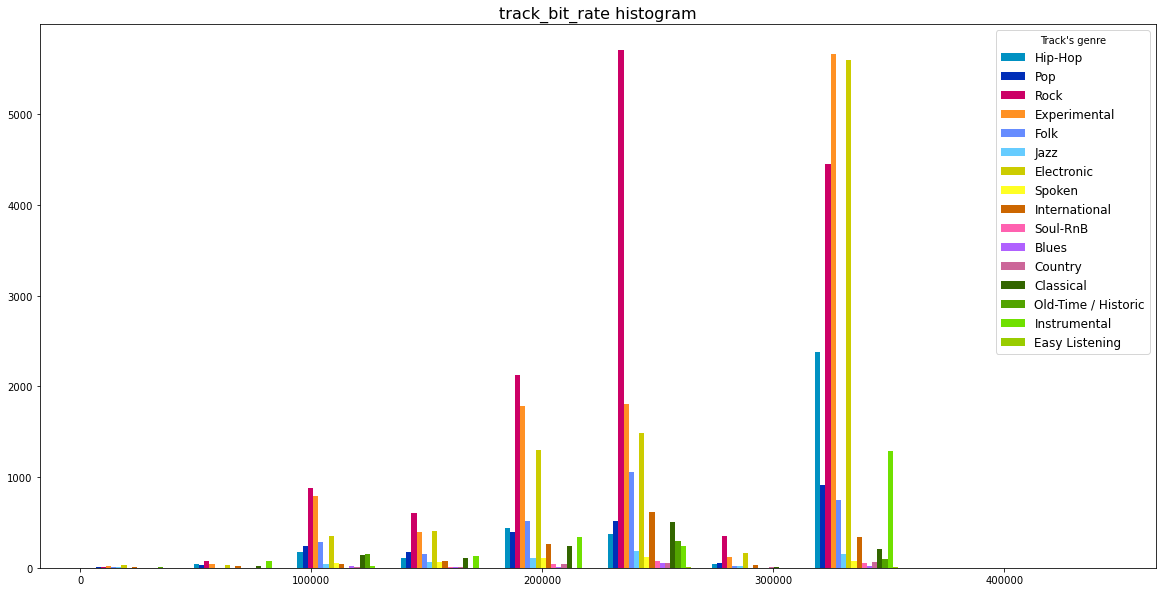

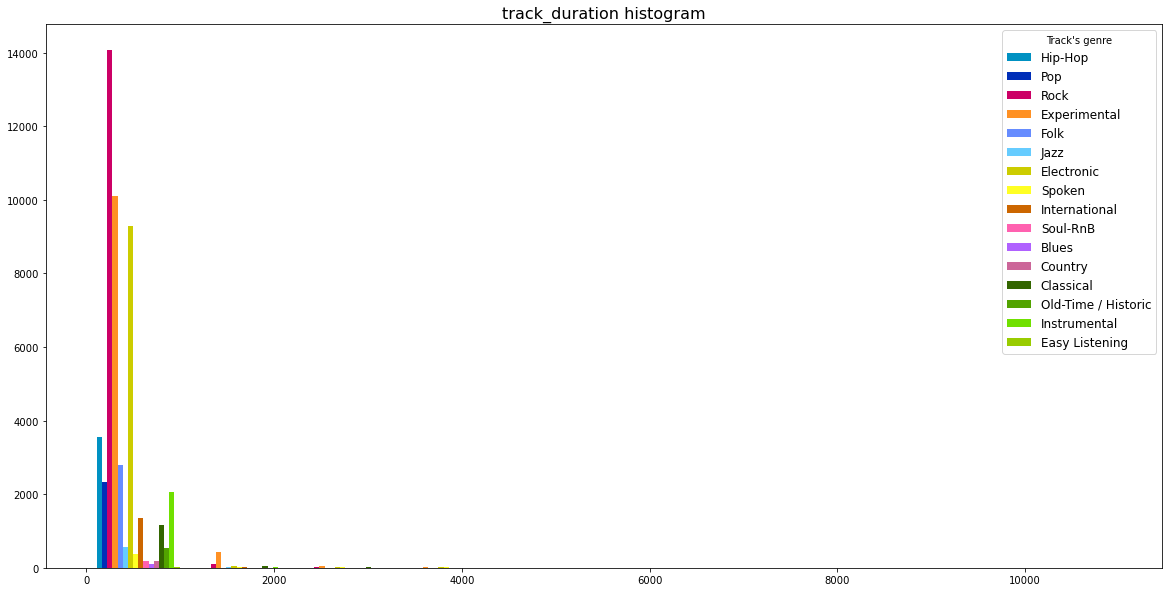

In [733]:
plot_distributions(df_tracks_reduced, 'track_genre_top', True)

In [735]:
df_tracks_reduced

,album_year_created,track_bit_rate,track_duration,track_genre_top
0,2008.0,256000,168,Hip-Hop
1,2008.0,256000,237,Hip-Hop
2,2008.0,256000,206,Hip-Hop
3,2008.0,192000,161,Pop
4,2008.0,256000,311,NaN
...,...,...,...,...
106569,2017.0,320000,162,Rock
106570,2017.0,320000,217,Rock
106571,2017.0,320000,404,Rock
106572,2017.0,320000,146,Rock


<b>We maintain in this dataset only notna values, to realize a significative parallel coordinates plot</b>

In [736]:
df_tracks_reduced = df_tracks_reduced[df_tracks_reduced['track_genre_top'].notna()]
df_tracks_reduced

,album_year_created,track_bit_rate,track_duration,track_genre_top
0,2008.0,256000,168,Hip-Hop
1,2008.0,256000,237,Hip-Hop
2,2008.0,256000,206,Hip-Hop
3,2008.0,192000,161,Pop
9,2008.0,256000,207,Hip-Hop
...,...,...,...,...
106568,2017.0,320000,38,Rock
106569,2017.0,320000,162,Rock
106570,2017.0,320000,217,Rock
106571,2017.0,320000,404,Rock


In [737]:
class_column = list(df_tracks_reduced["track_genre_top"].values)

In [738]:
new_column_idx = df_tracks_reduced.columns.get_loc('track_duration')+1
new_column_idx

3

In [739]:
del df_tracks_reduced["track_genre_top"]

<b>We normalize the dataset, to compare all features</b>

In [740]:
x = df_tracks_reduced.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df_tracks_norm_reduced = pd.DataFrame(x_scaled, columns = df_tracks_reduced.columns)

df_tracks_norm_reduced

,album_year_created,track_bit_rate,track_duration
0,0.0,0.571430,0.015231
1,0.0,0.571430,0.021487
2,0.0,0.571430,0.018676
3,0.0,0.428573,0.014597
4,0.0,0.571430,0.018767
...,...,...,...
49593,1.0,0.714286,0.003445
49594,1.0,0.714286,0.014687
49595,1.0,0.714286,0.019674
49596,1.0,0.714286,0.036627


In [741]:
df_tracks_norm_reduced.insert(new_column_idx, 'track_genre_top', class_column)

In [742]:
df_tracks_norm_reduced

,album_year_created,track_bit_rate,track_duration,track_genre_top
0,0.0,0.571430,0.015231,Hip-Hop
1,0.0,0.571430,0.021487,Hip-Hop
2,0.0,0.571430,0.018676,Hip-Hop
3,0.0,0.428573,0.014597,Pop
4,0.0,0.571430,0.018767,Hip-Hop
...,...,...,...,...
49593,1.0,0.714286,0.003445,Rock
49594,1.0,0.714286,0.014687,Rock
49595,1.0,0.714286,0.019674,Rock
49596,1.0,0.714286,0.036627,Rock


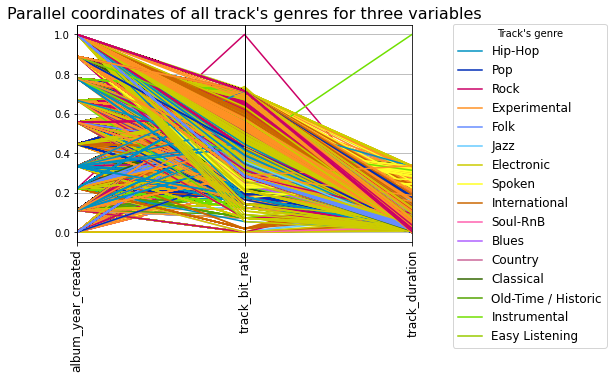

In [745]:
ax2 = parallel_coordinates(df_tracks_norm_reduced, 'track_genre_top', cols = cols, 
                                     color=('#0091C2', '#002EB8', '#CC0066', '#FF9124', '#668CFF', '#66CCFF', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00'))

ax2.legend(loc='upper right', bbox_to_anchor = (1.6, 1.03), title = "Track's genre", frameon = True, fontsize = 12)

plt.title("Parallel coordinates of all track's genres for three variables", fontsize = 16)
plt.xticks(rotation=90, fontsize = 12)
plt.show()

In [746]:
categories = categories = [i for i in df_tracks_norm_reduced.columns if i != 'track_genre_top']
categories

['album_year_created', 'track_bit_rate', 'track_duration']

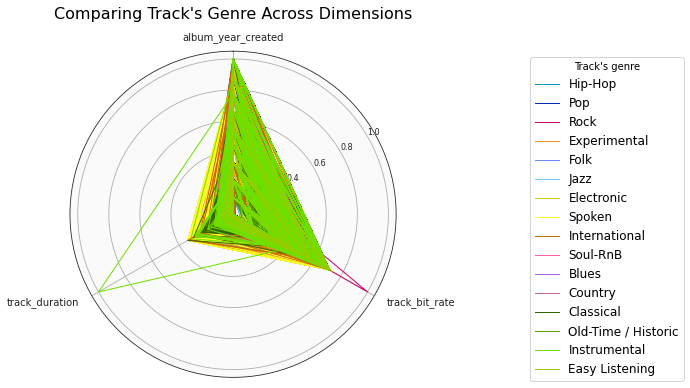

In [748]:
plot_radar_plot(df_tracks_norm_reduced, categories, 'track_genre_top', "Track's genre", True)

<b>Since we notice the presence of two very different values from the rest, let's check which they are, as we suspect that they are outliers</b>

In [749]:
df_tracks_norm_reduced[df_tracks_norm_reduced['track_duration'] > 0.7]

,album_year_created,track_bit_rate,track_duration,track_genre_top
40362,0.777778,0.428573,1.0,Instrumental


In [751]:
df_tracks_norm_reduced[df_tracks_norm_reduced['track_bit_rate'] > 0.8]

,album_year_created,track_bit_rate,track_duration,track_genre_top
13745,0.222222,1.0,0.001632,Rock


<h3>Attempt to replace the missing values of musical genres</h3>

<b>We create a copy of the original dataset</b>

In [776]:
df_tracks_copy = df_tracks.copy()
df_tracks_copy

,track_id,album_year_created,album_year_released,album_id,album_listens,album_tracks,album_type,artist_id,set_split,set_subset,track_bit_rate,track_duration,track_genre_top,track_genres,track_genres_all,track_number
0,2,2008,2009,1,6073,7,Album,1,training,small,256000,168,Hip-Hop,[21],[21],3
1,3,2008,2009,1,6073,7,Album,1,training,medium,256000,237,Hip-Hop,[21],[21],4
2,5,2008,2009,1,6073,7,Album,1,training,small,256000,206,Hip-Hop,[21],[21],6
3,10,2008,2008,6,47632,2,Album,6,training,small,192000,161,Pop,[10],[10],1
4,20,2008,2009,4,2710,13,Album,4,training,large,256000,311,NaN,"[76, 103]","[17, 10, 76, 103]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,162,Rock,[25],"[25, 12]",3
106570,155317,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,217,Rock,[25],"[25, 12]",4
106571,155318,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,404,Rock,[25],"[25, 12]",6
106572,155319,2017,2017,22940,1506,6,Live Performance,24357,training,large,320000,146,Rock,[25],"[25, 12]",5


<b>We remove nonessential features</b>

In [777]:
for column in df_tracks_copy.columns:
    if column != 'track_genre_top':
        if column not in cols:
            df_tracks_copy = df_tracks_copy.drop(column, axis =1)
        
df_tracks_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   album_year_created  106574 non-null  object
 1   track_bit_rate      106574 non-null  object
 2   track_duration      106574 non-null  object
 3   track_genre_top     49598 non-null   object
dtypes: object(4)
memory usage: 3.3+ MB


<b>We change the dtype of all columns except that of the track's genres</b>

In [778]:
for col in df_tracks_copy.columns:
    if col in cols:
        df_tracks_copy.loc[:, col] = pd.to_numeric(df_tracks_copy.loc[:, col], errors = "coerce", downcast='integer')

In [779]:
df_tracks_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   album_year_created  103045 non-null  float64
 1   track_bit_rate      106574 non-null  int32  
 2   track_duration      106574 non-null  int16  
 3   track_genre_top     49598 non-null   object 
dtypes: float64(1), int16(1), int32(1), object(1)
memory usage: 2.2+ MB


<b>We check the corresponding track_bit_rate for each track_genre_top</b>, taking obviously unique values of track_bit_rate.

In [781]:
list_of_genres = [genre for genre in df_tracks_copy['track_genre_top'].dropna().unique()]
tab_genres = []
dict_genres = dict()

for genre in list_of_genres:
    #countries_list = list(set(df_tracks[df_tracks['track_language_code'] == lang]['artist_location']))
    bit_rate_list = [i for i in set(df_tracks_copy[df_tracks_copy['track_genre_top'] == genre]['track_bit_rate'])]
    #bit_rate_list = [i for i in bit_rate_list if i!= 'nan']
    
    dict_genres[genre] = bit_rate_list
    
    #for the print
    bit_rate_list = "\n".join(map(str,bit_rate_list))
    tab_genres.append((genre, bit_rate_list))
    
headers = ["Genres", "Track bit rate"]

print(tabulate(tab_genres, headers, tablefmt = "grid", colalign = ("left", "left")))

+---------------------+------------------+
| Genres              | Track bit rate   |
+=====================+==================+
| Hip-Hop             | 256000           |
|                     | 274441           |
|                     | 292887           |
|                     | 243765           |
|                     | 254006           |
|                     | 176182           |
|                     | 247868           |
|                     | 237633           |
|                     | 176193           |
|                     | 225345           |
|                     | 272457           |
|                     | 186442           |
|                     | 321610           |
|                     | 247884           |
|                     | 264281           |
|                     | 274530           |
|                     | 153712           |
|                     | 252017           |
|                     | 243830           |
|                     | 252030           |
|          

In [783]:
tab_equal_bit_rate = []
dict_uguali = dict()
list_uguali = []

for i in range(len(list_of_genres)):
    for j in range(i+1, len(list_of_genres)):
        #print(list_of_genres[i], list_of_genres[j])
        uguali = []
      
        for val in dict_genres[list_of_genres[i]]:
            if (val in dict_genres[list_of_genres[j]]): 
                uguali.append(val)
        
        if uguali:
            k = " - ".join(map(str, (list_of_genres[i], list_of_genres[j])))
            dict_uguali[k] = uguali
            list_uguali.append(uguali)
            
            #for the print
            uguali = "\n".join(map(str,uguali))
            #tab_equal_countries.append(((list_of_genres[i], list_of_genres[j]), uguali))
            tab_equal_bit_rate.append((k, uguali))

In [784]:
headers = ["Pairs of genres", "Equal bit rate"]

print(tabulate(tab_equal_bit_rate, headers, tablefmt = "grid", colalign = ("left", "left")))

+--------------------------------------+------------------+
| Pairs of genres                      | Equal bit rate   |
+======================================+==================+
| Hip-Hop - Pop                        | 256000           |
|                                      | 80000            |
|                                      | 160000           |
|                                      | 320000           |
|                                      | 64000            |
|                                      | 224000           |
|                                      | 128000           |
|                                      | 192000           |
|                                      | 96000            |
|                                      | 243694           |
+--------------------------------------+------------------+
| Hip-Hop - Rock                       | 256000           |
|                                      | 80000            |
|                                      |

In [787]:
flat_list_uguali = list(set([item for sublist in list_uguali for item in sublist]))

<b>We create a copy of this dataset to see if we can replace the missing musical genre</b>

In [793]:
df_tracks_copy_prova = df_tracks_copy.copy()

In [794]:
for i, row in enumerate(df_tracks_copy_prova['track_genre_top']):  
    
    if ((pd.isnull(df_tracks_copy_prova.iloc[i, 3])) and not (pd.isnull(df_tracks_copy_prova.iloc[i, 1]))):
        
        bit_rate = df_tracks_copy_prova.iloc[i, 1]
                
        if not (bit_rate in flat_list_uguali):
            
            for k in dict_genres.keys():
                if bit_rate in dict_genres[k]:
                    df_tracks_copy_prova.at[i, 'track_genre_top'] = k
                    
                    #print(i, row, "\t", bit_rate, "\t", k)

In [789]:
df_tracks_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   album_year_created  103045 non-null  float64
 1   track_bit_rate      106574 non-null  int32  
 2   track_duration      106574 non-null  int16  
 3   track_genre_top     49598 non-null   object 
dtypes: float64(1), int16(1), int32(1), object(1)
memory usage: 2.2+ MB


In [797]:
tab, headers, miss_val = tab_missing_values(df_tracks_copy)

print(tabulate(tab, headers, tablefmt = "simple", colalign = ("left", "right", "right")))

print()
print("{} features with missing values".format(miss_val))

Feature               Number of missing values    Percentage    Present values
------------------  --------------------------  ------------  ----------------
track_genre_top                 56976 / 106574       53.46 %             49598
album_year_created               3529 / 106574        3.31 %            103045

2 features with missing values


In [798]:
tab, headers, miss_val = tab_missing_values(df_tracks_copy_prova)

print(tabulate(tab, headers, tablefmt = "simple", colalign = ("left", "right", "right")))

print()
print("{} features with missing values".format(miss_val))

Feature               Number of missing values    Percentage    Present values
------------------  --------------------------  ------------  ----------------
track_genre_top                 56602 / 106574       53.11 %             49972
album_year_created               3529 / 106574        3.31 %            103045

2 features with missing values


<h1>Genres dataset</h1>

In [1204]:
df_genres = pd.read_csv("genres.csv")

In [1205]:
df_genres

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5
...,...,...,...,...,...
158,1032,60,102,Turkish,2
159,1060,30,46,Tango,2
160,1156,26,130,Fado,2
161,1193,72,763,Christmas,38


In [1206]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


<b>We don't have missing values</b>

In [1477]:
unique_genres = []

for column in df_genres.columns:
    unique = df_genres[column].unique()
    unique_genres.append((column, unique, len(unique)))
    
headers = ['Feature', 'Unique values', 'Num']

print(tabulate(unique_genres, headers, tablefmt = "grid", colalign = ("center", "left", "center")))

+-----------+----------------------------------------------------------------------------+-------+
|  Feature  | Unique values                                                              |  Num  |
+===========+============================================================================+=======+
| genre_id  | [   1    2    3    4    5    6    7    8    9   10   11   12   13   14     |  163  |
|           |    15   16   17   18   19   20   21   22   25   26   27   30   31   32     |       |
|           |    33   36   37   38   41   42   43   45   46   47   49   53   58   63     |       |
|           |    64   65   66   70   71   74   76   77   79   81   83   85   86   88     |       |
|           |    89   90   92   94   97   98  100  101  102  103  107  109  111  113     |       |
|           |   117  118  125  130  137  138  166  167  169  170  171  172  173  174     |       |
|           |   175  176  177  178  179  180  181  182  183  184  185  186  187  188     |       |
|         

We verify if there are columns which have a single value for all cells.

In [1478]:
df_genres.nunique() == 1

genre_id     False
#tracks      False
parent       False
title        False
top_level    False
dtype: bool

<h1>Features dataset</h1>

In [813]:
df_features = pd.read_csv("features.csv")

In [814]:
df_features

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,statistics,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,...,std,std,std,kurtosis,max,mean,median,min,skew,std
1,number,01,02,03,04,05,06,07,08,09,...,04,05,06,01,01,01,01,01,01,01
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
4,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106572,155316,-0.490129,0.463834,2.32197,-0.0843522,1.66291,2.11519,-0.237794,5.69544,0.830353,...,0.12841,0.0225471,0.0198161,4.44826,0.172852,0.0287726,0.0283203,0.00390625,0.955388,0.0123847
106573,155317,-0.461559,-0.229601,-0.496632,-0.422033,0.130612,-0.263825,-0.628103,-0.0826865,-0.229483,...,0.132964,0.0235476,0.0265269,3.27061,0.196289,0.031116,0.027832,0.00244141,1.28306,0.0190591
106574,155318,0.552473,-0.110498,-0.532014,0.263131,-0.224011,-0.530972,1.71353,1.41844,1.3252,...,0.108324,0.0175401,0.0204714,2.35673,0.212891,0.0384498,0.0371094,0.00341797,0.828569,0.0179043
106575,155319,-0.176901,0.187208,-0.0506639,0.368843,0.0660052,-0.857354,-0.78086,0.626281,-0.630938,...,0.0883108,0.0183284,0.017936,6.1886,0.16748,0.04148,0.0380859,0.00488281,1.81874,0.0201334


In [815]:
def hasNumbers(inputString):
    for i, char in enumerate(inputString):
        if char.isdigit():
            inputString = inputString.replace(char, "")
    return inputString

In [816]:
for i, column in enumerate (df_features.columns):
    col = column
    if "." in col:
        col = col.replace(".", "_")
    else :
        col = col+"_"   
        
    col = hasNumbers(col)
    col = col + str(df_features.iloc[0][column]) + "_" + str(df_features.iloc[1][column])

    df_features = df_features.rename({column: col}, axis = 1)

In [817]:
df_features

,feature_statistics_number,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,statistics,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,...,std,std,std,kurtosis,max,mean,median,min,skew,std
1,number,01,02,03,04,05,06,07,08,09,...,04,05,06,01,01,01,01,01,01,01
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
4,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106572,155316,-0.490129,0.463834,2.32197,-0.0843522,1.66291,2.11519,-0.237794,5.69544,0.830353,...,0.12841,0.0225471,0.0198161,4.44826,0.172852,0.0287726,0.0283203,0.00390625,0.955388,0.0123847
106573,155317,-0.461559,-0.229601,-0.496632,-0.422033,0.130612,-0.263825,-0.628103,-0.0826865,-0.229483,...,0.132964,0.0235476,0.0265269,3.27061,0.196289,0.031116,0.027832,0.00244141,1.28306,0.0190591
106574,155318,0.552473,-0.110498,-0.532014,0.263131,-0.224011,-0.530972,1.71353,1.41844,1.3252,...,0.108324,0.0175401,0.0204714,2.35673,0.212891,0.0384498,0.0371094,0.00341797,0.828569,0.0179043
106575,155319,-0.176901,0.187208,-0.0506639,0.368843,0.0660052,-0.857354,-0.78086,0.626281,-0.630938,...,0.0883108,0.0183284,0.017936,6.1886,0.16748,0.04148,0.0380859,0.00488281,1.81874,0.0201334


In [818]:
new_name = df_features.iloc[2]['feature_statistics_number']
df_features = df_features.rename({'feature_statistics_number': new_name}, axis = 1)

In [819]:
df_features

,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,statistics,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,...,std,std,std,kurtosis,max,mean,median,min,skew,std
1,number,01,02,03,04,05,06,07,08,09,...,04,05,06,01,01,01,01,01,01,01
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
4,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106572,155316,-0.490129,0.463834,2.32197,-0.0843522,1.66291,2.11519,-0.237794,5.69544,0.830353,...,0.12841,0.0225471,0.0198161,4.44826,0.172852,0.0287726,0.0283203,0.00390625,0.955388,0.0123847
106573,155317,-0.461559,-0.229601,-0.496632,-0.422033,0.130612,-0.263825,-0.628103,-0.0826865,-0.229483,...,0.132964,0.0235476,0.0265269,3.27061,0.196289,0.031116,0.027832,0.00244141,1.28306,0.0190591
106574,155318,0.552473,-0.110498,-0.532014,0.263131,-0.224011,-0.530972,1.71353,1.41844,1.3252,...,0.108324,0.0175401,0.0204714,2.35673,0.212891,0.0384498,0.0371094,0.00341797,0.828569,0.0179043
106575,155319,-0.176901,0.187208,-0.0506639,0.368843,0.0660052,-0.857354,-0.78086,0.626281,-0.630938,...,0.0883108,0.0183284,0.017936,6.1886,0.16748,0.04148,0.0380859,0.00488281,1.81874,0.0201334


In [820]:
df_features = df_features.iloc[3:]
df_features = df_features.reset_index(drop=True)

In [821]:
df_features

,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
1,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02
2,5,5.2756297588e-01,-7.7654317021e-02,-2.7961030602e-01,6.8588310480e-01,1.9375696182e+00,8.8083887100e-01,-9.2319184542e-01,-9.2723226547e-01,6.6661673784e-01,...,4.0730185807e-02,1.2690781616e-02,1.4759079553e-02,6.8084154129e+00,3.7500000000e-01,5.3114086390e-02,4.1503906250e-02,0.0000000000e+00,2.1933031082e+00,4.4860601425e-02
3,10,3.7022454739e+00,-2.9119303823e-01,2.1967420578e+00,-2.3444947600e-01,1.3673638105e+00,9.9841135740e-01,1.7706941366e+00,1.6045658588e+00,5.2121698856e-01,...,7.4357867241e-02,1.7951935530e-02,1.3921394013e-02,2.1434211731e+01,4.5214843750e-01,7.7514506876e-02,7.1777343750e-02,0.0000000000e+00,3.5423245430e+00,4.0800448507e-02
4,20,-1.9383698702e-01,-1.9852678478e-01,2.0154602826e-01,2.5855624676e-01,7.7520370483e-01,8.4794059396e-02,-2.8929358721e-01,-8.1641042233e-01,4.3850939721e-02,...,9.5002755523e-02,2.2492416203e-02,2.1355332807e-02,1.6669036865e+01,4.6972656250e-01,4.7224905342e-02,4.0039062500e-02,9.7656250000e-04,3.1898307800e+00,3.0992921442e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,-0.490129,0.463834,2.32197,-0.0843522,1.66291,2.11519,-0.237794,5.69544,0.830353,...,0.12841,0.0225471,0.0198161,4.44826,0.172852,0.0287726,0.0283203,0.00390625,0.955388,0.0123847
106570,155317,-0.461559,-0.229601,-0.496632,-0.422033,0.130612,-0.263825,-0.628103,-0.0826865,-0.229483,...,0.132964,0.0235476,0.0265269,3.27061,0.196289,0.031116,0.027832,0.00244141,1.28306,0.0190591
106571,155318,0.552473,-0.110498,-0.532014,0.263131,-0.224011,-0.530972,1.71353,1.41844,1.3252,...,0.108324,0.0175401,0.0204714,2.35673,0.212891,0.0384498,0.0371094,0.00341797,0.828569,0.0179043
106572,155319,-0.176901,0.187208,-0.0506639,0.368843,0.0660052,-0.857354,-0.78086,0.626281,-0.630938,...,0.0883108,0.0183284,0.017936,6.1886,0.16748,0.04148,0.0380859,0.00488281,1.81874,0.0201334


In [822]:
print('{1} features for {0} tracks'.format(*df_features.shape))

519 features for 106574 tracks


In [823]:
df_features.info(verbose=True, max_cols = 600)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 519 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   track_id                        106574 non-null  object
 1   chroma_cens_kurtosis_01         106574 non-null  object
 2   chroma_cens_kurtosis_02         106574 non-null  object
 3   chroma_cens_kurtosis_03         106574 non-null  object
 4   chroma_cens_kurtosis_04         106574 non-null  object
 5   chroma_cens_kurtosis_05         106574 non-null  object
 6   chroma_cens_kurtosis_06         106574 non-null  object
 7   chroma_cens_kurtosis_07         106574 non-null  object
 8   chroma_cens_kurtosis_08         106574 non-null  object
 9   chroma_cens_kurtosis_09         106574 non-null  object
 10  chroma_cens_kurtosis_10         106574 non-null  object
 11  chroma_cens_kurtosis_11         106574 non-null  object
 12  chroma_cens_kurtosis_12      

In [824]:
FeatureMissValcount = 0

for i, value in (df_features.isnull().sum().items()):
    if value!=0:
        FeatureMissValcount+=1
        print("{0:23} {1}".format(i, value))
        
print("{} features with missing values".format(FeatureMissValcount))

0 features with missing values


In [847]:
for column in df_features.columns:
    #if not ("mean" in column) | ("std" in column):
    if not ("mean" in column):
        df_features = df_features.drop(column, axis = 1)

In [848]:
df_features.info(verbose = True, max_cols = 300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   chroma_cens_mean_01         106574 non-null  object
 1   chroma_cens_mean_02         106574 non-null  object
 2   chroma_cens_mean_03         106574 non-null  object
 3   chroma_cens_mean_04         106574 non-null  object
 4   chroma_cens_mean_05         106574 non-null  object
 5   chroma_cens_mean_06         106574 non-null  object
 6   chroma_cens_mean_07         106574 non-null  object
 7   chroma_cens_mean_08         106574 non-null  object
 8   chroma_cens_mean_09         106574 non-null  object
 9   chroma_cens_mean_10         106574 non-null  object
 10  chroma_cens_mean_11         106574 non-null  object
 11  chroma_cens_mean_12         106574 non-null  object
 12  chroma_cqt_mean_01          106574 non-null  object
 13  chroma_cqt_mean_02          1

In [853]:
for col in df_features.columns:
    df_features.loc[:, col] = pd.to_numeric(df_features.loc[:, col], errors = "coerce", downcast='integer')

In [854]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   chroma_cens_mean_01         106574 non-null  float64
 1   chroma_cens_mean_02         106574 non-null  float64
 2   chroma_cens_mean_03         106574 non-null  float64
 3   chroma_cens_mean_04         106574 non-null  float64
 4   chroma_cens_mean_05         106574 non-null  float64
 5   chroma_cens_mean_06         106574 non-null  float64
 6   chroma_cens_mean_07         106574 non-null  float64
 7   chroma_cens_mean_08         106574 non-null  float64
 8   chroma_cens_mean_09         106574 non-null  float64
 9   chroma_cens_mean_10         106574 non-null  float64
 10  chroma_cens_mean_11         106574 non-null  float64
 11  chroma_cens_mean_12         106574 non-null  float64
 12  chroma_cqt_mean_01          106574 non-null  float64
 13  chroma_cqt_mea

In [861]:
tab_mean_std = []

for i, column in enumerate(df_features.columns):
    tab_mean_std.append((i, column, df_features[column].mean(), df_features[column].std()))
    
headers = ['Index','Feature (means columns)', 'Mean', 'Standard deviation']

print(tabulate(tab_mean_std, headers, tablefmt = "grid", colalign = ("center", "center", "center", "center")))

+---------+----------------------------+--------------+----------------------+
|  Index  |  Feature (means columns)   |     Mean     |  Standard deviation  |
+=========+============================+==============+======================+
|    0    |    chroma_cens_mean_01     |   0.257083   |      0.0815078       |
+---------+----------------------------+--------------+----------------------+
|    1    |    chroma_cens_mean_02     |   0.251316   |      0.0734161       |
+---------+----------------------------+--------------+----------------------+
|    2    |    chroma_cens_mean_03     |   0.249253   |      0.0796255       |
+---------+----------------------------+--------------+----------------------+
|    3    |    chroma_cens_mean_04     |   0.250905   |      0.0711609       |
+---------+----------------------------+--------------+----------------------+
|    4    |    chroma_cens_mean_05     |   0.253644   |      0.0783235       |
+---------+----------------------------+------------

<h1>Echonest dataset</h1>

In [1558]:
df_echonest = pd.read_csv("echonest.csv")

In [1559]:
df_echonest

,Unnamed: 0,echonest,echonest.1,echonest.2,echonest.3,echonest.4,echonest.5,echonest.6,echonest.7,echonest.8,...,echonest.239,echonest.240,echonest.241,echonest.242,echonest.243,echonest.244,echonest.245,echonest.246,echonest.247,echonest.248
0,NaN,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,metadata,...,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features
1,NaN,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,...,214,215,216,217,218,219,220,221,222,223
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,...,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
4,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,...,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13127,124857,0.00759238,0.790364,0.719288,0.853114,0.720715,0.0825495,141.332,0.890461,NaN,...,-1.72121,4.68608,0.213789,0.2088,0.00791067,0.06395,2.04073,1.97678,8.14453,147.04
13128,124862,0.0414979,0.843077,0.536496,0.865151,0.547949,0.0740006,101.975,0.476845,NaN,...,-0.647897,1.28231,0.214586,0.18186,0.0112473,0.0624,0.92236,0.85996,1.79474,6.32127
13129,124863,0.000124355,0.609686,0.895136,0.846624,0.632903,0.0515172,129.996,0.496667,NaN,...,-0.771613,1.62351,0.180471,0.128185,0.0101027,0.06222,2.25116,2.18894,5.57834,89.1803
13130,124864,0.327576,0.574426,0.548327,0.452867,0.0759279,0.0333884,142.009,0.569274,NaN,...,-2.05414,7.92715,0.250178,0.219205,0.0148506,0.0639,1.48744,1.42354,2.17309,12.504


In [1564]:
for i, column in enumerate (df_echonest.columns):
    
    col = str(df_echonest.iloc[0][column]) + "_" + str(df_echonest.iloc[1][column])
    
    df_echonest = df_echonest.rename({column: col}, axis = 1)

In [ ]:
new_name = df_echonest.iloc[2]['nan_nan']
df_echonest = df_echonest.rename({'nan_nan': new_name}, axis = 1)

In [1570]:
df_echonest

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,...,temporal_features_214,temporal_features_215,temporal_features_216,temporal_features_217,temporal_features_218,temporal_features_219,temporal_features_220,temporal_features_221,temporal_features_222,temporal_features_223
0,NaN,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,metadata,...,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features
1,NaN,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,...,214,215,216,217,218,219,220,221,222,223
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,...,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
4,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,...,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13127,124857,0.00759238,0.790364,0.719288,0.853114,0.720715,0.0825495,141.332,0.890461,NaN,...,-1.72121,4.68608,0.213789,0.2088,0.00791067,0.06395,2.04073,1.97678,8.14453,147.04
13128,124862,0.0414979,0.843077,0.536496,0.865151,0.547949,0.0740006,101.975,0.476845,NaN,...,-0.647897,1.28231,0.214586,0.18186,0.0112473,0.0624,0.92236,0.85996,1.79474,6.32127
13129,124863,0.000124355,0.609686,0.895136,0.846624,0.632903,0.0515172,129.996,0.496667,NaN,...,-0.771613,1.62351,0.180471,0.128185,0.0101027,0.06222,2.25116,2.18894,5.57834,89.1803
13130,124864,0.327576,0.574426,0.548327,0.452867,0.0759279,0.0333884,142.009,0.569274,NaN,...,-2.05414,7.92715,0.250178,0.219205,0.0148506,0.0639,1.48744,1.42354,2.17309,12.504


In [1571]:
df_echonest = df_echonest.iloc[3:]
df_echonest = df_echonest.reset_index(drop=True)

In [1572]:
df_echonest

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,...,temporal_features_214,temporal_features_215,temporal_features_216,temporal_features_217,temporal_features_218,temporal_features_219,temporal_features_220,temporal_features_221,temporal_features_222,temporal_features_223
0,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,...,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
1,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,...,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
2,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,NaN,...,-2.2883579731,11.5271091461,0.2568213642,0.2378199995,0.0601223968,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047
3,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,2008-03-11,...,-3.6629877090,21.5082283020,0.2833518982,0.2670699954,0.1257044971,0.0808200017,8.4140100479,8.3331899643,21.3170642853,483.4038085938
4,134,0.4522173071,0.5132380502,0.5604099311,0.0194426943,0.0965666940,0.5255193792,114.2900000000,0.8940722715,NaN,...,-1.4526963234,2.3563981056,0.2346863896,0.1995500028,0.1493317783,0.0644000024,11.2670698166,11.2026700974,26.4541797638,751.1477050781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,124857,0.00759238,0.790364,0.719288,0.853114,0.720715,0.0825495,141.332,0.890461,NaN,...,-1.72121,4.68608,0.213789,0.2088,0.00791067,0.06395,2.04073,1.97678,8.14453,147.04
13125,124862,0.0414979,0.843077,0.536496,0.865151,0.547949,0.0740006,101.975,0.476845,NaN,...,-0.647897,1.28231,0.214586,0.18186,0.0112473,0.0624,0.92236,0.85996,1.79474,6.32127
13126,124863,0.000124355,0.609686,0.895136,0.846624,0.632903,0.0515172,129.996,0.496667,NaN,...,-0.771613,1.62351,0.180471,0.128185,0.0101027,0.06222,2.25116,2.18894,5.57834,89.1803
13127,124864,0.327576,0.574426,0.548327,0.452867,0.0759279,0.0333884,142.009,0.569274,NaN,...,-2.05414,7.92715,0.250178,0.219205,0.0148506,0.0639,1.48744,1.42354,2.17309,12.504


In [1575]:
df_echonest.info(verbose=True, max_cols = 300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Data columns (total 250 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   track_id                            13129 non-null  object
 1   audio_features_acousticness         13129 non-null  object
 2   audio_features_danceability         13129 non-null  object
 3   audio_features_energy               13129 non-null  object
 4   audio_features_instrumentalness     13129 non-null  object
 5   audio_features_liveness             13129 non-null  object
 6   audio_features_speechiness          13129 non-null  object
 7   audio_features_tempo                13129 non-null  object
 8   audio_features_valence              13129 non-null  object
 9   metadata_album_date                 2717 non-null   object
 10  metadata_album_name                 2872 non-null   object
 11  metadata_artist_latitude            9770 non-null   o

In [1804]:
df_echonest.shape[0]

13129

In [1811]:
tab, headers, miss_val = tab_missing_values(df_echonest)

print(tabulate(tab, headers, tablefmt = "simple", colalign = ("left", "right")))

print()
print("{} features with missing values".format(miss_val))

Feature                          Number of missing values    Present values
-----------------------------  --------------------------  ----------------
ranks_song_currency_rank                    11096 / 13129              2033
ranks_song_hotttnesss_rank                  10923 / 13129              2206
metadata_album_date                         10412 / 13129              2717
ranks_artist_hotttnesss_rank                10305 / 13129              2824
ranks_artist_discovery_rank                 10304 / 13129              2825
ranks_artist_familiarity_rank               10304 / 13129              2825
metadata_album_name                         10257 / 13129              2872
metadata_artist_latitude                     3359 / 13129              9770
metadata_artist_location                     3359 / 13129              9770
metadata_artist_longitude                    3359 / 13129              9770

10 features with missing values


We observe some examples of features that have more of 10.000 missing values.

In [1600]:
for i in table_ord_def[:7]:
    df = pd.DataFrame(df_echonest[i[0]].dropna())
    print(df)

      ranks_song_currency_rank
3            115691.0000000000
5           1871529.0000000000
20           960853.0000000000
51          1730881.0000000000
52          1871529.0000000000
...                        ...
13069                   371300
13070                   451433
13107               4.6449e+06
13116              6.02038e+06
13128               4.8825e+06

[2033 rows x 1 columns]
      ranks_song_hotttnesss_rank
3               67609.0000000000
5             5415434.0000000000
20            3088636.0000000000
51             469613.0000000000
52            4416204.0000000000
...                          ...
13069                     471628
13070                     564287
13107                 4.4162e+06
13116                5.71426e+06
13128                 2.8115e+06

[2206 rows x 1 columns]
      metadata_album_date
3              2008-03-11
8                    2005
51                   2007
61             2006-11-07
62             2006-11-07
...                   ...


We observe some examples of other features that have missing values.

In [1599]:
for i in table_ord_def[7:]:
    df = pd.DataFrame(df_echonest[i[0]].dropna())
    print(df)

      metadata_artist_latitude
0                32.6783000000
1                32.6783000000
2                32.6783000000
3                39.9523000000
4                32.6783000000
...                        ...
13124                  52.1082
13125                  52.1082
13126                  52.1082
13127                  52.1082
13128                  35.7497

[9770 rows x 1 columns]
                      metadata_artist_location
0                                  Georgia, US
1                                  Georgia, US
2                                  Georgia, US
3                         Philadelphia, PA, US
4                                  Georgia, US
...                                        ...
13124                              Netherlands
13125                              Netherlands
13126                              Netherlands
13127                              Netherlands
13128  Higashiyamato-shi, Tokyo Prefecture, JP

[9770 rows x 1 columns]
      metadata